Copyright 2021 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Multi-word transformations

Just as we can think about words reflecting latent variables, we can consider how sequences of words can be indicators of some latent variable of interest.
The word sequence could be short or long and still systematically relate to a latent variable.
For example, consider noun phrases like `George Washington` and `the first president of the United States` - both refer to the same person but are quite different in length.
In this notebook, we will explore transformations on multi-word units.
It is important to note that these methods can be applied to both raw words and words that have already been transformed using the methods previously discussed.

## What you will learn

You will learn about transformations of multi-words units that can be used as features in predictive models.
  
We will cover:

- Ngrams
- Named entity recognition
- Chunking with parts of speech
- Dependency parsing

## When to use multi-word transformations

Multi-word transformations can be thought of as a kind of preprocessing that converts words into features.
The transformations we discuss take a nontrivial amount of a data to learn, so they can also be viewed as a kind of data augmentation (or reduction) that is useful when you are working with a small amount of data: by redescribing your text data using a smaller set of tokens, you are making it easier for your model to learn the structure of the data.
While some transformations we'll cover are fairly theory-neutral, we will also describe transformations that allow you to impose your own theory regarding the latent variables behind the data.

<!-- TODO: this is identical to single word; are we missing anything? -->

## Ngrams

An [**ngram**](https://en.wikipedia.org/wiki/N-gram) is just a sequence of words that you treat as a unit of analysis.
Words, which we've already looked at a lot, are **unigrams**.
Length 2 ngrams are **bigrams**, length 3 ngrams are **trigrams**, and so on.
When we discuss ngrams in this notebook, we mean bigrams and above, which is consistent with common usage of the word `ngrams`.

Let's start by importing `nltk` and storing the words that we will use in our running example:

- `import nltk as nltk`
- Set `words` to make list from text `"I like to fly more than a fly in the ointment . My tooth is aching ."` with delimiter `" "` (a single space)

In [18]:
import nltk as nltk
words = 'I like to fly more than a fly in the ointment . My tooth is aching .'.split(' ')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="sHgTZgsI9vJQ3M#lu+,B">nltk</variable><variable id="cc)LJ@o:#+Q/bjV+nw7E">words</variable></variables><block type="importAs" id="|Lgb)._R/(OoNvhctV=J" x="139" y="155"><field name="libraryName">nltk</field><field name="libraryAlias" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><next><block type="variables_set" id="Y`HIOjJh?SQ$=OMt4Pr5"><field name="VAR" id="cc)LJ@o:#+Q/bjV+nw7E">words</field><value name="VALUE"><block type="lists_split" id="LW@]%KZ*Y}C:2NUEomQ@"><mutation mode="SPLIT"></mutation><field name="MODE">SPLIT</field><value name="INPUT"><block type="text" id="45|G8`H+}-r%H.,1lqpB"><field name="TEXT">I like to fly more than a fly in the ointment . My tooth is aching .</field></block></value><value name="DELIM"><shadow type="text" id="BkEBlQE=V]{t?pMU|`%c"><field name="TEXT"> </field></shadow></value></block></value></block></next></block></xml>

To see bigrams and trigrams for these words do:

- print list with `nltk` do `bigrams` using `words` (use the list block, not create list)
- print list with `nltk` do `trigrams` using `words`

In [19]:
print(list(nltk.bigrams(words)))
print(list(nltk.trigrams(words)))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="sHgTZgsI9vJQ3M#lu+,B">nltk</variable><variable id="cc)LJ@o:#+Q/bjV+nw7E">words</variable></variables><block type="text_print" id="}.LubNHKk,,jvaz^V@vl" x="33" y="293"><value name="TEXT"><shadow type="text" id="=4!3j|iEy/`?G=B#mDAg"><field name="TEXT">abc</field></shadow><block type="listBlock" id="/dzh1WCIUoK/BW3D-A{;"><value name="x"><block type="varDoMethod" id="l-X%E_DDl_bP2j7;8d!e"><field name="VAR" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><field name="MEMBER">bigrams</field><data>nltk:bigrams</data><value name="INPUT"><block type="variables_get" id="Ek-?u6)KmN3HM).1^giS"><field name="VAR" id="cc)LJ@o:#+Q/bjV+nw7E">words</field></block></value></block></value></block></value><next><block type="text_print" id="|lkt,Hj{uLy1%4~Nd*tW"><value name="TEXT"><shadow type="text" id="qOmC]G(1QkXy+I]ECxnU"><field name="TEXT">abc</field></shadow><block type="listBlock" id="DhVf(Icuuc)uDDAYlTw|"><value name="x"><block type="varDoMethod" id="h@ji8I#bC8/K;,o_|old"><field name="VAR" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><field name="MEMBER">trigrams</field><data>nltk:trigrams</data><value name="INPUT"><block type="variables_get" id="ku99x;^1yWRo|/R$Xd^1"><field name="VAR" id="cc)LJ@o:#+Q/bjV+nw7E">words</field></block></value></block></value></block></value></block></next></block></xml>

[('I', 'like'), ('like', 'to'), ('to', 'fly'), ('fly', 'more'), ('more', 'than'), ('than', 'a'), ('a', 'fly'), ('fly', 'in'), ('in', 'the'), ('the', 'ointment'), ('ointment', '.'), ('.', 'My'), ('My', 'tooth'), ('tooth', 'is'), ('is', 'aching'), ('aching', '.')]
[('I', 'like', 'to'), ('like', 'to', 'fly'), ('to', 'fly', 'more'), ('fly', 'more', 'than'), ('more', 'than', 'a'), ('than', 'a', 'fly'), ('a', 'fly', 'in'), ('fly', 'in', 'the'), ('in', 'the', 'ointment'), ('the', 'ointment', '.'), ('ointment', '.', 'My'), ('.', 'My', 'tooth'), ('My', 'tooth', 'is'), ('tooth', 'is', 'aching'), ('is', 'aching', '.')]


As you can see, these functions have grouped the words into overlapping tuples.
For bigrams, there is an overlap of 1 (the last word of a bigram is the first word of the next), but for trigrams, the overlap is 2 (the last 2 words of the trigram are the first two words of the next).
Ngrams are an example of a **sliding window** approach where the width of the window is the size of the ngram, and the window advances one word at a time to generate the next ngram.

When you work with ngrams, you need to decide if you will make them for each sentence or if you will make them off a list of all word tokens.
One thing to consider in this decision is whether you want the first ngram in a sentence to be marked as such.
When sentences are tokenized, you lose the ngram that straddles the end of one sentence and the beginning of the next.
For this reason, researchers will sometimes put an artificial `start` and `end` token on sentence boundaries.

NLTK has additional functions that can be used to [make ngrams of arbitrary length](https://www.nltk.org/api/nltk.util.html?highlight=ngrams#nltk.util.ngrams), [ngrams of different lengths simultaneously (i.e. both bigrams and trigrams)](https://www.nltk.org/api/nltk.util.html?highlight=ngrams#nltk.util.everygrams), add the start/end symbols discussed above, and even compute [**skipgrams**](https://www.nltk.org/api/nltk.util.html?highlight=ngrams#nltk.util.skipgrams), where words in the ngram are no longer adjacent.

You can also generate ngrams in `sklearn` using `CountVectorizer`'s [ngram_range](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) parameter.
As we previously discussed in the context of vectorizing words, `sklearn`'s implementation is convenient but not very flexible, so when you want more control, NLTK is a good option.

**It is essential to note that larger ngrams increase the sparsity of your features**.
Thus longer ngrams may become extremely distinctive features for a single observation and less generalizable across observations.

Finally, ngrams can group any kind of token, which may be your original words, transformed words, or even multi-word units we discuss next.

## Named entity recognition

Named entity recognition is a kind of **chunking**. 
Whereas ngrams have an arbitrary length (e.g. 2, 3, and so on), chunks have a length defined by some kind of rule.
Typically, the rule defining the length of a chunk is strongly related to the **category** the chunk belongs to.
For that reason, chunking often functions as a kind of tagging that operates over multi-word units. 

Named entity recognition is a particular kind of chunking where words are tagged with a semantic category like `PERSON`.
The typical focus of named entity recognition is proper nouns where some kind of world knowledge is needed to determine the semantic category.
The number of named entity tags varies across formalisms and algorithms (just like part of speech tags do), but a recent standard is shown below.

| Tag         | Description                                          |
|:------------|:-----------------------------------------------------|
| PERSON      | People, including fictional.                         |
| NORP        | Nationalities or religious or political groups.      |
| FAC         | Buildings, airports, highways, bridges, etc.         |
| ORG         | Companies, agencies, institutions, etc.              |
| GPE         | Countries, cities, states.                           |
| LOC         | Non-GPE locations, mountain ranges, bodies of water. |
| PRODUCT     | Objects, vehicles, foods, etc. (Not services.)       |
| EVENT       | Named hurricanes, battles, wars, sports events, etc. |
| WORK_OF_ART | Titles of books, songs, etc.                         |
| LAW         | Named documents made into laws.                      |
| LANGUAGE    | Any named language.                                  |
| DATE        | Absolute or relative dates or periods.               |
| TIME        | Times smaller than a day.                            |
| PERCENT     | Percentage, including ”%“.                           |
| MONEY       | Monetary values, including unit.                     |
| QUANTITY    | Measurements, as of weight or distance.              |
| ORDINAL     | “first”, “second”, etc.                              |
| CARDINAL    | Numerals that do not fall under another type.        |

[spaCy](https://spacy.io/) has good support for named entity recognition, so let's import it:

- import `spacy` as `spacy`

In [20]:
import spacy as spacy

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Sx$2f*/(}{:Z%|nUO:A`">spacy</variable></variables><block type="importAs" id=")]RP|5CAV6hh4G;CmQu?" x="16" y="10"><field name="libraryName">spacy</field><field name="libraryAlias" id="Sx$2f*/(}{:Z%|nUO:A`">spacy</field></block></xml>

And set it up with an example:

- Set `nlp` to with `spacy` do `load` using `"en_core_web_sm"` (this loads models for English)
- Do a freestyle `nlp.max_length = 1500000` (to prevent memory errors later)
- Set `doc` to with `nlp` do `__call__` using `"Elvis Presley, a rock legend, was born in 1935 in Memphis, TN."` (this annotates a document)

*Notes:*

- *`nlp.__call__(text)` is equivalent to `nlp(text)`, which you will see in most examples*
- *If you get an error, you may need to download spacy models by executing the following in a terminal: `python -m spacy download en_core_web_sm`*

In [87]:
nlp = spacy.load('en_core_web_sm')

nlp.max_length = 1500000

doc = nlp.__call__('Elvis Presley, a rock legend, was born in 1935 in Memphis, TN.')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="}J9Du$O|,qZv^V|Z6m78">nlp</variable><variable id="0rQK29_=:K[U9jIKK~,`">doc</variable><variable id="Sx$2f*/(}{:Z%|nUO:A`">spacy</variable></variables><block type="variables_set" id="f[2:[,K%}5H?Ny*9B;SU" x="126" y="221"><field name="VAR" id="}J9Du$O|,qZv^V|Z6m78">nlp</field><value name="VALUE"><block type="varDoMethod" id="6Q+rd/k1RDf]x_]+Pjc]"><field name="VAR" id="Sx$2f*/(}{:Z%|nUO:A`">spacy</field><field name="MEMBER">load</field><data>spacy:load</data><value name="INPUT"><block type="text" id="NQ2Ic5U!9b[PZlTHVhOO"><field name="TEXT">en_core_web_sm</field></block></value></block></value></block><block type="dummyOutputCodeBlock" id="%z3+6{M?h+|_=$7g6)os" x="94" y="284"><field name="CODE">nlp.max_length = 1500000</field></block><block type="variables_set" id="WJnl5UOmrv,+Bx/rsO^=" x="118" y="361"><field name="VAR" id="0rQK29_=:K[U9jIKK~,`">doc</field><value name="VALUE"><block type="varDoMethod" id="^QDGGKsxSrSvc{({8On3"><field name="VAR" id="}J9Du$O|,qZv^V|Z6m78">nlp</field><field name="MEMBER">__call__</field><data>nlp:__call__</data><value name="INPUT"><block type="text" id="kj}ZO+!5^m*}(n4FI)tu"><field name="TEXT">Elvis Presley, a rock legend, was born in 1935 in Memphis, TN.</field></block></value></block></value></block></xml>

The approach here is a little different than NLTK.
In NLTK, the result of applying some NLP algorithm is typically a simple data structure like a list.
In contrast, spaCy will throw [multiple algorithms at some text in a classic NLP pipeline approach.](https://spacy.io/usage/processing-pipelines/)
The resulting `doc` here contains multiple annotations from these pipeline elements (you can see the elements by running `nlp.pipe_names`), so we have to unpack `doc` to get named entities.

*If spaCy is slow, you may consider disabling or removing pipeline elements, e.g. `nlp.remove_pipe('parser')`*

To get the named entities as chunks, do:

- Create a list comprehension for each `i` in list `from doc get ents` 
    - yield a tuple containing freestyle `i.text` and freestyle `i.label_`

In [88]:
[((i.text,i.label_)) for i in (doc.ents)]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mV8O{[5OVyKrQbSdPCN{">i</variable><variable id="0rQK29_=:K[U9jIKK~,`">doc</variable></variables><block type="lists_create_with" id="7?!n75M9=}Ee9K=Q(.uT" x="12" y="237"><mutation items="1"></mutation><value name="ADD0"><block type="comprehensionForEach" id=".1b1^,,RS%%(M|0rex^7"><field name="VAR" id="mV8O{[5OVyKrQbSdPCN{">i</field><value name="LIST"><block type="varGetProperty" id="?(ci2/0TdvqWuS^Ig}7N"><field name="VAR" id="0rQK29_=:K[U9jIKK~,`">doc</field><field name="MEMBER">ents</field><data>doc:ents</data></block></value><value name="YIELD"><block type="tupleBlock" id="dhNa5%ctX1WHP0$#)*c|"><value name="FIRST"><block type="dummyOutputCodeBlock" id="_{uz)*JjHjwH`g_h_iY2"><field name="CODE">i.text</field></block></value><value name="SECOND"><block type="dummyOutputCodeBlock" id="4!I[.AO:Z_E/1gaVXS8,"><field name="CODE">i.label_</field></block></value></block></value></block></value></block></xml>

[('Elvis Presley', 'PERSON'), ('1935', 'DATE'), ('Memphis', 'GPE'), ('TN', 'ORG')]

The resulting list of tuples gives the named entity for each word as the second element and skips words that were not named entities.

How might named entities be used in an analysis?
Here are some ideas:

- Get all the `PERSON`s mentioned in a text and run them through `FreqDist` to determine who is important
- Get all the `PERSON`s mentioned in a text and run bigrams on them to determine who is interacting with whom
- Collect `PERSON`s and `ORG`s mentioned in the same sentence to determine who has an affiliation with an `ORG` and how much (e.g. using `ConditionalFreqDist`)
- Reduce text to only named entities and then vectorize on the associated words (like `Elvis Presley`) or tags (like `PERSON`).

## Chunking with parts of speech

A most classic use of chunking is to identify noun phrases (NPs).
Why extract NPs?
Often NPs refer to an entity of interest that may be expressed in a sequence of words.
Consider our Elvis example, where the NPs have been highlighted:

<mark>Elvis/NNP Presley/NNP</mark> ,/, <mark>a/DT rock/NN legend/NN</mark> ,/, was/VBD born/VBN in/IN 1935/CD in/IN <mark>Memphis/NNP</mark> ,/, <mark>TN/NNP</mark> ./.'

We can create an NP chunker in NLTK by defining a grammar.
Here is an example **rule** of an NP chunker grammar:

`"NP: {<DT>?<JJ.*>*<NN.*>+}"`

This rule says "If you find zero or one DT tag (`<DT>?`) followed by zero or more tags that start with JJ (`<JJ.*>*`) followed by one or more tags that start with NN (`<NN.*>+`), then chunk that as an NP."

Let's try it:

- Set `grammar` to `"NP: {<DT>?<JJ.*>*<NN.*>+}"`
- Set `chunker` to with `nltk` create `RegexpParser` using `grammar`
- Set `taggedSentence` to with `nltk` do `pos_tag` using with `nltk` do `word_tokenize` using `"Elvis Presley, a rock legend, was born in 1935 in Memphis, TN."`

In [97]:
grammar = 'KEYPHRASE: {(((<JJ.*>|<NN.*>) )+|((<JJ.*>|<NN.*>) )*(<NN.*> <IN.*> )((<JJ.*>|<NN.*>) )*)<NN.*>}'
chunker = nltk.RegexpParser(grammar)
taggedSentence = nltk.pos_tag(nltk.word_tokenize('Elvis Presley, a rock legend, was born in 1935 in Memphis, TN.'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="IsF_ObNR!!.PE0K4+K+*">grammar</variable><variable id="(0Fx,+F;1S@[/})}o)cx">chunker</variable><variable id="sHgTZgsI9vJQ3M#lu+,B">nltk</variable><variable id="=TwzIz!mO[!Rz**+CwnW">taggedSentence</variable></variables><block type="variables_set" id="|$deS5(h@FNZ~@:(8WA_" x="36" y="44"><field name="VAR" id="IsF_ObNR!!.PE0K4+K+*">grammar</field><value name="VALUE"><block type="text" id="oAqs2txqU]^8_h9@xplY"><field name="TEXT">KEYPHRASE: {(((&lt;JJ.*&gt;|&lt;NN.*&gt;) )+|((&lt;JJ.*&gt;|&lt;NN.*&gt;) )*(&lt;NN.*&gt; &lt;IN.*&gt; )((&lt;JJ.*&gt;|&lt;NN.*&gt;) )*)&lt;NN.*&gt;}</field></block></value><next><block type="variables_set" id=",%AVx[0=4N*Yf~#~I:|D"><field name="VAR" id="(0Fx,+F;1S@[/})}o)cx">chunker</field><value name="VALUE"><block type="varCreateObject" id="ZU2yqjSWBBY(+g9jvF$z"><field name="VAR" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><field name="MEMBER">RegexpParser</field><data>nltk:RegexpParser</data><value name="INPUT"><block type="variables_get" id="9nw{*)2m?J2YPUP~kWLD"><field name="VAR" id="IsF_ObNR!!.PE0K4+K+*">grammar</field></block></value></block></value><next><block type="variables_set" id="?N1*K?[L//M2$dceRTdR"><field name="VAR" id="=TwzIz!mO[!Rz**+CwnW">taggedSentence</field><value name="VALUE"><block type="varDoMethod" id="/AU=uyu66U0i#$G8Bk]~"><field name="VAR" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><field name="MEMBER">pos_tag</field><data>nltk:pos_tag</data><value name="INPUT"><block type="varDoMethod" id="i^vvY9}T;KUl~{{m=TrR"><field name="VAR" id="sHgTZgsI9vJQ3M#lu+,B">nltk</field><field name="MEMBER">word_tokenize</field><data>nltk:word_tokenize</data><value name="INPUT"><block type="text" id="grJM[$Z`(vr)90LYSf/{"><field name="TEXT">Elvis Presley, a rock legend, was born in 1935 in Memphis, TN.</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Now run the chunker:

- Set `chunks` to with `chunker` do parse using `taggedSentence`
- Print `chunks` (you must use print here to prevent NLTK from trying to draw it)

In [98]:
chunks = chunker.parse(taggedSentence)
print(chunks)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="un+wl7XZsvw.m*R((#In">chunks</variable><variable id="(0Fx,+F;1S@[/})}o)cx">chunker</variable><variable id="=TwzIz!mO[!Rz**+CwnW">taggedSentence</variable></variables><block type="variables_set" id="tUG3VEb1x($5vqU{g{86" x="-2" y="272"><field name="VAR" id="un+wl7XZsvw.m*R((#In">chunks</field><value name="VALUE"><block type="varDoMethod" id="xT|x{vPHBkfTjg.__^~U"><field name="VAR" id="(0Fx,+F;1S@[/})}o)cx">chunker</field><field name="MEMBER">parse</field><data>chunker:parse</data><value name="INPUT"><block type="variables_get" id=")(S8qOxF(LHL3F3iCbM$"><field name="VAR" id="=TwzIz!mO[!Rz**+CwnW">taggedSentence</field></block></value></block></value><next><block type="text_print" id="S)rjn8DWaI!$Jno6e,=-"><value name="TEXT"><shadow type="text" id=":Vk9uTh_x@xGVr.#8E-c"><field name="TEXT">abc</field></shadow><block type="variables_get" id="V6~bW0^Ti7;]xeDl%OeV"><field name="VAR" id="un+wl7XZsvw.m*R((#In">chunks</field></block></value></block></next></block></xml>

(S
  (KEYPHRASE Elvis/NNP Presley/NNP)
  ,/,
  a/DT
  (KEYPHRASE rock/NN legend/NN)
  ,/,
  was/VBD
  born/VBN
  in/IN
  1935/CD
  in/IN
  Memphis/NNP
  ,/,
  TN/NNP
  ./.)


Notice the `NP` tag in front of `Elvis Presley`, `a rock legend`, `Memphis`, and `TN`.

Change the grammar above to this **key phrase** grammar proposed by [Justeson and Katz](https://brenocon.com/JustesonKatz1995.pdf):

- `"KEYPHRASE: {(((<JJ.*>|<NN.*>) )+|((<JJ.*>|<NN.*>) )*(<NN.*> <IN.*> )((<JJ.*>|<NN.*>) )*)<NN.*>}"`

The vertical bars (`|`) indicate logical `OR`, meaning any pattern separated by the bars will match, in order.

Now we only see two key phrases, `Elvis Presley` and `a rock legend`, because single word matches are no longer allowed.
To get an output format more like the named entity recognition output above, do this:

- freestyle `[(" ".join([ i[0] for i in j]), "KEYPHRASE") for j in chunks.subtrees() if j.label() == "KEYPHRASE"]`

<!-- NOTE: great opportunity here to add filters to comprehensions -->

In [109]:
[(" ".join([ i[0] for i in j]), "KEYPHRASE") for j in chunks.subtrees() if j.label() == "KEYPHRASE"]

#<xml xmlns="https://developers.google.com/blockly/xml"><block type="dummyOutputCodeBlock" id="oo~OB7--L,]5o3IcroGf" x="6" y="311"><field name="CODE">[(" ".join([ i[0] for i in j]), "KEYPHRASE") for j in chunks.subtrees() if j.label() == "KEYPHRASE"]</field></block></xml>

[('Elvis Presley', 'KEYPHRASE'), ('rock legend', 'KEYPHRASE')]

Like named entities, you can do `FreqDist`s, bigrams, or vectorize your custom chunks.
Because the chunker just takes tuples as input, you could even create a chunker that operates on the named entity tuples output by spaCy!

## Dependency parsing

When people talking about parsing in NLP, they normally don't mean a single application of chunking like we did above.
Instead they mean **hierarchical** chunking, which you might be familiar with from diagramming sentences as a child.
There are two main ways of representing the hierarchy in linguistics, dependency grammars and constituent grammars.
The differences between these two approaches is shown in the figure below:


[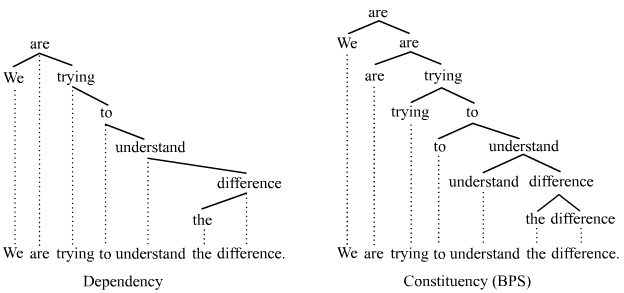](https://commons.wikimedia.org/wiki/File:Wearetryingtounderstandthedifference_(2).jpg)

Notice that contituents on the right are what we'd expect if we ran a chunker over words, and then another chunker over the first chunker's output and so on (parsing is more complicated than this, but that's the main idea).

In contrast, dependency grammars only specify the **head** of a dependency.
Every word has one and only one head, with the main verb of the sentence being headed by an invisible `ROOT` word.
Dependency grammars preserve most of the interesting information in constituency grammars and are much easier to work with, because instead of working with trees, we can consider the dependency annotations at the level of the word.
Take a look at the spaCy output below for `He started the car`



| Word    | Index | Tag | Dep   | Head    | HIndx | HTag |
|---------|-------|-----|-------|---------|-------|------|
| He      | 0     | PRP | nsubj | started | 3     | VBD  |
| started | 3     | VBD | ROOT  | started | 3     | VBD  |
| the     | 11    | DT  | det   | car     | 15    | NN   |
| car     | 15    | NN  | dobj  | started | 3     | VBD  |

where

- Word is the word token
- Index is the character position in the text where the word begins
- Tag is the part of speech for the word
- Dep is the relation of the word to its head
- Head is the word that *governs* the word token
- HIndx is the character position in the text where the head begins
- HTag is the part of speech for the head

There are a few interesting ways we could use this new information.
One way is to make 'bigrams' of each word and its head.
This would be a bit like skipgrams but more theoretically oriented/cleaner.
Another way is to use the `Dep` relation to identify words of interest.
For example, we might be interested in `nsubj` of sentences or main verbs of sentences.

Let's quickly demonstrate these two examples, using the spaCy output above:

- print list for each item `i` in list `doc` yield freestyle `(i.text,i.head.text)`
- print list for each item `i` in list `doc` yield freestyle `(i.text,i.dep_)`

In [113]:
print(list((i.text,i.head.text) for i in doc))
print(list((i.text,i.dep_) for i in doc))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mV8O{[5OVyKrQbSdPCN{">i</variable><variable id="0rQK29_=:K[U9jIKK~,`">doc</variable></variables><block type="text_print" id="AbM@^b/$0Z0we|Q2b^u4" x="-145" y="105"><value name="TEXT"><shadow type="text" id="=yzBF_i$br()KZS?1+00"><field name="TEXT">abc</field></shadow><block type="listBlock" id="JBjz3ja1hRTI;zZzfR$X"><value name="x"><block type="comprehensionForEach" id="?`OwY|Q*AwCLoHFVDMe+"><field name="VAR" id="mV8O{[5OVyKrQbSdPCN{">i</field><value name="LIST"><block type="variables_get" id="O(G[WEY]sWj_tNk7m=2h"><field name="VAR" id="0rQK29_=:K[U9jIKK~,`">doc</field></block></value><value name="YIELD"><block type="dummyOutputCodeBlock" id="Qn-d.@y}xWbAJ,AkOLy_"><field name="CODE">(i.text,i.head.text)</field></block></value></block></value></block></value><next><block type="text_print" id="?]YS7]iGL9:HYiF3$%??"><value name="TEXT"><shadow type="text"><field name="TEXT">abc</field></shadow><block type="listBlock" id="Q#jU=`Y(9ZAw^Z}*BBf9"><value name="x"><block type="comprehensionForEach" id="=IG)[6`h-^Hr((-=4RmP"><field name="VAR" id="mV8O{[5OVyKrQbSdPCN{">i</field><value name="LIST"><block type="variables_get" id="gwuEM}q^7P7VWci7c~^T"><field name="VAR" id="0rQK29_=:K[U9jIKK~,`">doc</field></block></value><value name="YIELD"><block type="dummyOutputCodeBlock" id="]5ep3Q*]u}^}}%mjm5.B"><field name="CODE">(i.text,i.dep_)</field></block></value></block></value></block></value></block></next></block></xml>

[('Elvis', 'Presley'), ('Presley', 'born'), (',', 'Presley'), ('a', 'legend'), ('rock', 'legend'), ('legend', 'Presley'), (',', 'Presley'), ('was', 'born'), ('born', 'born'), ('in', 'born'), ('1935', 'in'), ('in', 'born'), ('Memphis', 'in'), (',', 'Memphis'), ('TN', 'Memphis'), ('.', 'born')]
[('Elvis', 'compound'), ('Presley', 'nsubjpass'), (',', 'punct'), ('a', 'det'), ('rock', 'compound'), ('legend', 'appos'), (',', 'punct'), ('was', 'auxpass'), ('born', 'ROOT'), ('in', 'prep'), ('1935', 'pobj'), ('in', 'prep'), ('Memphis', 'pobj'), (',', 'punct'), ('TN', 'appos'), ('.', 'punct')]


The first output, as expected, is like skipgrams.
Most of the tuples contain words that are close together, which reflects a property of English that most dependencies are local (technically, English is projective).
Note also that the main verb, `born`, is listed as its own head (vs. `None` or `ROOT`).
The second output lists dependency relations much as we've been listing part of speech, but of course with the difference that the dependency relation reflects the role of the word in the sentence in a deeper way than part of speech can (e.g, the difference between a noun and the subject of a sentence).

As before, one could do `FreqDist`s or vectorize these tuples: anything we've discussed with ngrams or with word transformations could apply.